# Max-cut Problem with 12 nodes: 
### Split a graph into two subsets with the largest cut.

The maximum-cut problem (MAX-CUT) was the first application described in the original QAOA (quantum-approximate-optimization-algorithm paper) [1]. The goal of this problem is to partition the nodes of a graph into two sets such that the number of edges connecting nodes in opposite sets is maximized. pyQAOA requires the user to input how many slices (approximate steps) for the evolution between the reference and MAXCUT Hamiltonian. The algorithm then variationally determines the parameters for the rotations.

### Implementation

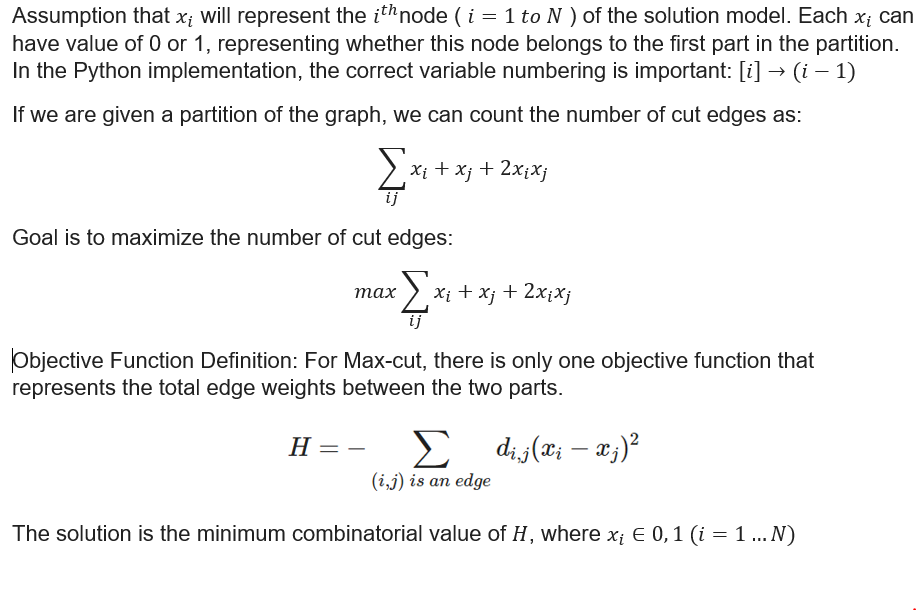

#### References:

     1. https://grove-docs.readthedocs.io/en/latest/qaoa.html
     2. https://github.com/rigetti/grove/blob/master/grove/pyqaoa/maxcut_qaoa.py#L89
     3. VQE Tutorial: https://github.com/DavitKhach/quantum-algorithms-tutorials
     4. http://docs.rigetti.com/en/v2.0.0/wavefunction_simulator.html


#### Acknowledgment: Many Thanks to Amy Brown of Rigetti for pointers to the grove and VQE repository.

### Notes and comments: The following code needs to be cleaned up and properly commented which I have been unable to do due to lack of time in meeting the deadline. Apologies for this but travelling due to my full-time professional duties and unforeseen doemstic emergencies took up a lot of time and energy during the last couple of weeks.

In [25]:
## maxcut_qaoa.py implements the cost function for MAX-CUT problems
## import the packages and connect to QVM

from pyquil import Program, get_qc
from pyquil.gates import *
import networkx as nx
import numpy as np
from pyquil.paulis import PauliTerm, PauliSum, sI, sX, sZ, exponentiate_commuting_pauli_sum
from pyquil.paulis import exponentiate, exponential_map, trotterize
from scipy.optimize import minimize
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
from pyquil.api import WavefunctionSimulator
from pyquil.gates import H, MEASURE, Z, RX, RZ, CZ
import matplotlib.pylab as plt
import pyquil.api as api
qvm_connection = api.QVMConnection()

In [26]:
## Generate a graph
steps = 2
graphs = [(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),
(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),
(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),
(3,6),(3,7),(3,8),(3,9),(3,10),(3,11),
(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),
(5,6),(5,7),(5,8),(5,9),(5,10),(5,11)]

inst = maxcut_qaoa(graph=graphs, steps=steps)
opt_betas, opt_gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [3.11557081 2.03253424 4.04798982 5.86448928] 
	E => -23.041693676819566
	Parameters: [3.11557081 2.03253424 4.04798982 5.86448928] 
	E => -22.262233327322967
	Parameters: [3.11557081 2.03253424 4.04798982 5.86448928] 
	E => -20.044330554771758
	Parameters: [3.11557081 2.03253424 4.04798982 5.86448928] 
	E => -22.113126610748957
	Parameters: [3.11557081 2.03253424 4.04798982 5.86448928] 
	E => -20.898526530076893
	Parameters: [3.03023279 2.07787597 4.06555922 5.67515195] 
	E => -20.961195799597924
	Parameters: [3.03023279 2.07787597 4.06555922 5.67515195] 
	E => -22.5509793483931
	Parameters: [3.03023279 2.07787597 4.06555922 5.67515195] 
	E => -22.504817279722545
	Parameters: [3.01860329 2.02810409 3.92884732 5.96493674] 
	E => -22.542869934451858
	Parameters: [3.01860329 2.02810409 3.92884732 5.96493674] 
	E => -23.684502935505652
	Parameters: [3.01860329 2.02810409 3.92884732 5.96493674] 
	E => -23.961359132660025
	Paramet

In [27]:
t = np.hstack((opt_betas, opt_gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = qvm_connection.wavefunction(prog)
wf = wf.amplitudes

In [28]:
# Convergence of the algorithm

for state_index in range(inst.nstates):
    print(inst.states[state_index], np.conj(wf[state_index]) * wf[state_index])

000000000000 (0.00037736986218594873+0j)
000000000001 (7.149290744546095e-05+0j)
000000000010 (7.149290744546144e-05+0j)
000000000011 (0.00022030810033521117+0j)
000000000100 (7.149290744546153e-05+0j)
000000000101 (0.0002203081003352109+0j)
000000000110 (0.00022030810033521096+0j)
000000000111 (0.0007140980598508496+0j)
000000001000 (7.149290744546172e-05+0j)
000000001001 (0.00022030810033521134+0j)
000000001010 (0.00022030810033520998+0j)
000000001011 (0.0007140980598508499+0j)
000000001100 (0.00022030810033521025+0j)
000000001101 (0.0007140980598508503+0j)
000000001110 (0.0007140980598508509+0j)
000000001111 (1.189206290664417e-05+0j)
000000010000 (7.149290744546138e-05+0j)
000000010001 (0.00022030810033521036+0j)
000000010010 (0.0002203081003352106+0j)
000000010011 (0.0007140980598508511+0j)
000000010100 (0.00022030810033520982+0j)
000000010101 (0.0007140980598508495+0j)
000000010110 (0.0007140980598508504+0j)
000000010111 (1.1892062906644533e-05+0j)
000000011000 (0.000220308100335

010000110111 (0.0013487843692721333+0j)
010000111000 (1.0400016663550367e-05+0j)
010000111001 (0.00028683373172857336+0j)
010000111010 (0.0002868337317285736+0j)
010000111011 (0.0013487843692721348+0j)
010000111100 (0.0002868337317285735+0j)
010000111101 (0.0013487843692721346+0j)
010000111110 (0.0013487843692721352+0j)
010000111111 (0.0007441466516834914+0j)
010001000000 (0.00022030810033521058+0j)
010001000001 (8.288946525675803e-05+0j)
010001000010 (8.28894652567578e-05+0j)
010001000011 (4.6723887145456695e-06+0j)
010001000100 (8.288946525675788e-05+0j)
010001000101 (4.6723887145456805e-06+0j)
010001000110 (4.67238871454569e-06+0j)
010001000111 (5.746598000071509e-05+0j)
010001001000 (8.288946525675795e-05+0j)
010001001001 (4.672388714545664e-06+0j)
010001001010 (4.672388714545557e-06+0j)
010001001011 (5.746598000071505e-05+0j)
010001001100 (4.672388714545583e-06+0j)
010001001101 (5.7465980000714876e-05+0j)
010001001110 (5.7465980000714896e-05+0j)
010001001111 (0.0001901112131535614

011001000111 (8.150137202200426e-05+0j)
011001001000 (1.0400016663550206e-05+0j)
011001001001 (5.746598000071512e-05+0j)
011001001010 (5.746598000071478e-05+0j)
011001001011 (8.150137202200461e-05+0j)
011001001100 (5.7465980000715e-05+0j)
011001001101 (8.15013720220045e-05+0j)
011001001110 (8.150137202200442e-05+0j)
011001001111 (5.7465980000714774e-05+0j)
011001010000 (1.0400016663550245e-05+0j)
011001010001 (5.746598000071496e-05+0j)
011001010010 (5.746598000071467e-05+0j)
011001010011 (8.15013720220046e-05+0j)
011001010100 (5.746598000071465e-05+0j)
011001010101 (8.150137202200453e-05+0j)
011001010110 (8.150137202200484e-05+0j)
011001010111 (5.7465980000714523e-05+0j)
011001011000 (5.746598000071475e-05+0j)
011001011001 (8.15013720220043e-05+0j)
011001011010 (8.150137202200476e-05+0j)
011001011011 (5.7465980000714523e-05+0j)
011001011100 (8.150137202200445e-05+0j)
011001011101 (5.746598000071444e-05+0j)
011001011110 (5.746598000071474e-05+0j)
011001011111 (1.0400016663550331e-05+0j)

100011000010 (1.0400016663550289e-05+0j)
100011000011 (5.746598000071492e-05+0j)
100011000100 (1.0400016663550297e-05+0j)
100011000101 (5.746598000071471e-05+0j)
100011000110 (5.746598000071466e-05+0j)
100011000111 (8.150137202200472e-05+0j)
100011001000 (1.0400016663550247e-05+0j)
100011001001 (5.746598000071484e-05+0j)
100011001010 (5.746598000071484e-05+0j)
100011001011 (8.150137202200447e-05+0j)
100011001100 (5.746598000071486e-05+0j)
100011001101 (8.150137202200452e-05+0j)
100011001110 (8.150137202200485e-05+0j)
100011001111 (5.746598000071466e-05+0j)
100011010000 (1.0400016663550368e-05+0j)
100011010001 (5.746598000071485e-05+0j)
100011010010 (5.746598000071467e-05+0j)
100011010011 (8.150137202200428e-05+0j)
100011010100 (5.7465980000714564e-05+0j)
100011010101 (8.150137202200424e-05+0j)
100011010110 (8.150137202200464e-05+0j)
100011010111 (5.7465980000714815e-05+0j)
100011011000 (5.7465980000714645e-05+0j)
100011011001 (8.15013720220042e-05+0j)
100011011010 (8.150137202200453e-0

101101010001 (0.0001901112131535609+0j)
101101010010 (0.00019011121315356042+0j)
101101010011 (5.746598000071481e-05+0j)
101101010100 (0.00019011121315356085+0j)
101101010101 (5.746598000071471e-05+0j)
101101010110 (5.7465980000714754e-05+0j)
101101010111 (4.672388714545732e-06+0j)
101101011000 (0.00019011121315356112+0j)
101101011001 (5.746598000071451e-05+0j)
101101011010 (5.746598000071466e-05+0j)
101101011011 (4.6723887145457135e-06+0j)
101101011100 (5.746598000071471e-05+0j)
101101011101 (4.672388714545683e-06+0j)
101101011110 (4.672388714545602e-06+0j)
101101011111 (8.288946525675829e-05+0j)
101101100000 (0.00028683373172857303+0j)
101101100001 (0.0001901112131535612+0j)
101101100010 (0.00019011121315356101+0j)
101101100011 (5.746598000071491e-05+0j)
101101100100 (0.00019011121315356148+0j)
101101100101 (5.746598000071471e-05+0j)
101101100110 (5.7465980000714916e-05+0j)
101101100111 (4.672388714545667e-06+0j)
101101101000 (0.00019011121315356137+0j)
101101101001 (5.74659800007144

110110000001 (0.0002868337317285724+0j)
110110000010 (0.00028683373172857347+0j)
110110000011 (0.00019011121315356166+0j)
110110000100 (0.0002868337317285727+0j)
110110000101 (0.00019011121315356153+0j)
110110000110 (0.00019011121315356158+0j)
110110000111 (5.746598000071496e-05+0j)
110110001000 (0.00028683373172857303+0j)
110110001001 (0.00019011121315356096+0j)
110110001010 (0.0001901112131535614+0j)
110110001011 (5.746598000071497e-05+0j)
110110001100 (0.00019011121315356118+0j)
110110001101 (5.746598000071478e-05+0j)
110110001110 (5.746598000071472e-05+0j)
110110001111 (4.672388714545623e-06+0j)
110110010000 (0.0002868337317285724+0j)
110110010001 (0.0001901112131535614+0j)
110110010010 (0.0001901112131535613+0j)
110110010011 (5.746598000071485e-05+0j)
110110010100 (0.00019011121315356101+0j)
110110010101 (5.7465980000714686e-05+0j)
110110010110 (5.7465980000715066e-05+0j)
110110010111 (4.6723887145456365e-06+0j)
110110011000 (0.00019011121315356134+0j)
110110011001 (5.746598000071

111111100011 (0.0007140980598508511+0j)
111111100100 (1.1892062906644233e-05+0j)
111111100101 (0.0007140980598508511+0j)
111111100110 (0.0007140980598508501+0j)
111111100111 (0.000220308100335211+0j)
111111101000 (1.1892062906644533e-05+0j)
111111101001 (0.0007140980598508504+0j)
111111101010 (0.0007140980598508495+0j)
111111101011 (0.00022030810033520982+0j)
111111101100 (0.0007140980598508511+0j)
111111101101 (0.0002203081003352106+0j)
111111101110 (0.00022030810033521036+0j)
111111101111 (7.149290744546138e-05+0j)
111111110000 (1.189206290664417e-05+0j)
111111110001 (0.0007140980598508509+0j)
111111110010 (0.0007140980598508503+0j)
111111110011 (0.00022030810033521025+0j)
111111110100 (0.0007140980598508499+0j)
111111110101 (0.00022030810033520998+0j)
111111110110 (0.00022030810033521134+0j)
111111110111 (7.149290744546172e-05+0j)
111111111000 (0.0007140980598508496+0j)
111111111001 (0.00022030810033521096+0j)
111111111010 (0.0002203081003352109+0j)
111111111011 (7.149290744546153e-

In [29]:
mxlist = []
for state_index in range(2**len(inst.qubits)):
    ww = np.conj(wf[state_index])*wf[state_index]
    mxlist.append([inst.states[state_index], ww.real])
    

In [30]:
mxlist.sort(key=lambda x: float(x[1]),reverse=True)

In [31]:
mxlist

[['000000111111', 0.23926666867310376],
 ['111111000000', 0.23926666867310376],
 ['000100111110', 0.0013487843692721385],
 ['001000111110', 0.0013487843692721385],
 ['110111000001', 0.0013487843692721385],
 ['111011000001', 0.0013487843692721385],
 ['011111000010', 0.0013487843692721378],
 ['100000111101', 0.0013487843692721378],
 ['000001111110', 0.0013487843692721376],
 ['011111000001', 0.0013487843692721376],
 ['100000111110', 0.0013487843692721376],
 ['111110000001', 0.0013487843692721376],
 ['000001111101', 0.0013487843692721359],
 ['111110000010', 0.0013487843692721359],
 ['000010111110', 0.0013487843692721352],
 ['010000111110', 0.0013487843692721352],
 ['101111000001', 0.0013487843692721352],
 ['111101000001', 0.0013487843692721352],
 ['010000111011', 0.0013487843692721348],
 ['101111000100', 0.0013487843692721348],
 ['000100110111', 0.0013487843692721346],
 ['000100111101', 0.0013487843692721346],
 ['010000011111', 0.0013487843692721346],
 ['010000111101', 0.001348784369272134

In [33]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(mxlist[0][0])):
    if mxlist[0][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [0, 1, 2, 3, 4, 5]
maxcut1 is  [6, 7, 8, 9, 10, 11]


In [34]:
mxcutlist0 = []
mxcutlist1 = []
for i in range(len(mxlist[1][0])):
    if mxlist[1][0][i] == '0':
        mxcutlist0.append(i)
    else:
        mxcutlist1.append(i)
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

maxcut0 is  [6, 7, 8, 9, 10, 11]
maxcut1 is  [0, 1, 2, 3, 4, 5]


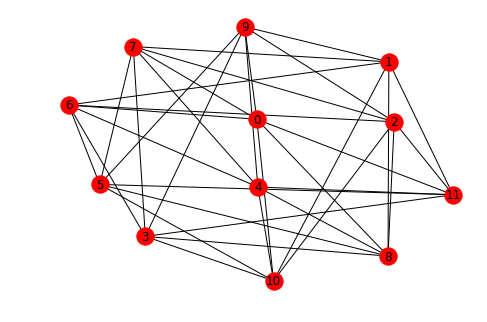

maxcut0 is  [6, 7, 8, 9, 10, 11]
maxcut1 is  [0, 1, 2, 3, 4, 5]


In [35]:
#draw graph
G = nx.Graph()
G.add_edges_from(graphs)
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
plt.show()
print("maxcut0 is ",mxcutlist0)
print("maxcut1 is ",mxcutlist1)

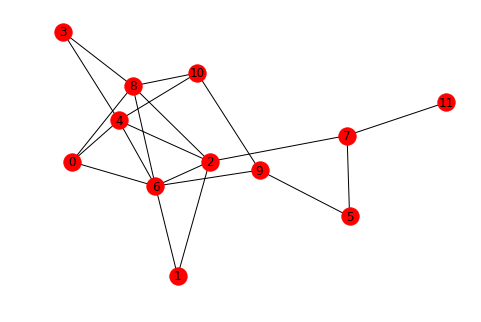

In [36]:
import random
random.seed()
init = random.randrange(1, 1000)
G01 = nx.erdos_renyi_graph(n=12, p=0.3, seed=init)
pos = nx.spring_layout(G01)
nx.draw(G01,pos,with_labels=True)
plt.show()

In [103]:
from pyquil.api import QVMConnection
from pyquil.noise import add_decoherence_noise
nqc = get_qc('2q-noisy-qvm')
pauli_channel = [0.1, 0.1, 0.1]
noisy_qvm = api.QVMConnection(gate_noise = pauli_channel)

In [104]:
inst = maxcut_qaoa(graph=graphs, steps=steps)
betas, gammas = inst.get_angles()
d = np.hstack((betas, gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(d)
wf = nqc.wavefunction(prog)
wf = wf.amplitudes

                     models will be ineffective
	Parameters: [0.4421342  2.30115224 1.1694328  1.79883755] 
	E => -19.102558533527848
	Parameters: [0.45411977 2.05856089 1.20113429 1.84880526] 
	E => -20.69577875475603
	Parameters: [0.45411977 2.05856089 1.20113429 1.84880526] 
	E => -20.20945470513445
	Parameters: [0.45411977 2.05856089 1.20113429 1.84880526] 
	E => -19.75333379722025
	Parameters: [0.45411977 2.05856089 1.20113429 1.84880526] 
	E => -19.78485961196035
	Parameters: [0.45411977 2.05856089 1.20113429 1.84880526] 
	E => -20.243214303328298
	Parameters: [0.45411977 2.05856089 1.20113429 1.84880526] 
	E => -20.634267490657564
	Parameters: [0.46256272 1.96463797 1.23535374 1.92668462] 
	E => -20.30561854193249
	Parameters: [0.46256272 1.96463797 1.23535374 1.92668462] 
	E => -20.403674855842503
	Parameters: [0.46256272 1.96463797 1.23535374 1.92668462] 
	E => -20.759136424493608
	Parameters: [0.46256272 1.96463797 1.23535374 1.92668462] 
	E => -20.781771155701332
	Parameters

AttributeError: 'QuantumComputer' object has no attribute 'wavefunction'